<a href="https://colab.research.google.com/github/FarahSafwat/CognoRise-InfoTech/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries and reading data**



In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

#**Quick view**

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#number of rows in each column
df.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [ ]:
print("-the number of columns is :",df.columns.size)
print("-the number of rows is :", len(df)) #df.shape[0]
print("-the data shape is :",df.shape)
print("-the total number of elements in the dataset is:",df.size)
print("-the columns name are ",df.columns)

-the number of columns is : 9
-the number of rows is : 100000
-the data shape is : (100000, 9)
-the total number of elements in the dataset is: 900000
-the columns name are  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
#getting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#datatypes
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
#Data inspection
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
#searching for the unique values
for i in df.columns:
  print(i ,":",df[i].unique())
  print(df[i].nunique())
  print("______________________________________")

gender : ['Female' 'Male' 'Other']
3
______________________________________
age : [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
102
______________________________________
hypertension : [0 1]
2
______________________________________
heart_disease : [1 0]
2
______________________________________
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
6
______________________________________
bmi : [25.19 27.32 

#**Preprocessing**

##**Nulls**

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##**Duplicates**

In [ ]:
df.duplicated().sum()

3854

In [ ]:
print("the percentage of the duplicates in the data ",(df.duplicated().sum()/len(df))*100)

the percentage of the duplicates in the data  3.8539999999999996


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

##**Datatypes && Encoding**

In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.gender.value_counts()
df = pd.get_dummies(df, columns=['gender'])


In [ ]:
df.dtypes

age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
gender_Female             bool
gender_Male               bool
gender_Other              bool
dtype: object

In [ ]:
le = LabelEncoder()
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [ ]:
df['gender_Female'] = df['gender_Female'].astype(int)
df['gender_Male'] = df['gender_Male'].astype(int)

In [ ]:
df.dtypes

age                      int64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
gender_Female            int64
gender_Male              int64
gender_Other              bool
dtype: object

In [ ]:

df = df.drop(columns=['gender_Other'])



In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80,0,1,4,25.19,6.6,140,0,1,0
1,54,0,0,0,27.32,6.6,80,0,1,0
2,28,0,0,4,27.32,5.7,158,0,0,1
3,36,0,0,1,23.45,5.0,155,0,1,0
4,76,1,1,1,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99994,36,0,0,0,24.60,4.8,145,0,1,0
99996,2,0,0,0,17.37,6.5,100,0,1,0
99997,66,0,0,3,27.83,5.7,155,0,0,1
99998,24,0,0,4,35.42,4.0,100,0,1,0


In [ ]:
#searching for the unique values
for i in df.columns:
  print(i ,":",df[i].unique())
  print(df[i].nunique())
  print("______________________________________")

age : [80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  0 33 16 61 31  8 49 39 65 14 70 48
 51 71 64 63 52 10 35 23  1]
81
______________________________________
hypertension : [0 1]
2
______________________________________
heart_disease : [1 0]
2
______________________________________
smoking_history : [4 0 1 3 2 5]
6
______________________________________
bmi : [25.19 27.32 23.45 ... 59.42 44.39 60.52]
4247
______________________________________
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
18
______________________________________
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
18
______________________________________
diabetes : [0 1]
2
______________________________________
gender_Female : [1 0]
2
______________________________________
gender_Male : [0 1]
2
___

##**Outliers**

In [ ]:
# Columns with numerical values to calculate outliers
out_col = df[['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Dictionary to store percentage of outliers for each column
outliers_percentage = {}

# Calculate outliers using IQR method for each numerical column
for col in out_col.columns:
    Q1 = out_col[col].quantile(0.25)
    Q3 = out_col[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers based on calculated bounds
    outliers = out_col[(out_col[col] < lower_bound) | (out_col[col] > upper_bound)]

    # Calculate percentage of outliers relative to the total number of rows
    percentage_outliers = (len(outliers) / len(df)) * 100

    # Store the percentage of outliers for the current column
    outliers_percentage[col] = percentage_outliers

# Print the percentage of outliers for each column
for col, percentage in outliers_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")


Percentage of outliers in age: 0.00%
Percentage of outliers in smoking_history: 0.00%
Percentage of outliers in bmi: 5.57%
Percentage of outliers in HbA1c_level: 1.36%
Percentage of outliers in blood_glucose_level: 2.11%


In [ ]:
print(df.bmi.max())
print(df.bmi.min())

95.69
10.01


The values above 30 are considered obese and under 18.5 are underweight

In [ ]:
print(df.HbA1c_level.max())
print(df.HbA1c_level.min())

9.0
3.5


levels above 6.5% are indicative of diabetes, and levels between 5.7% to 6.4% are considered prediabetes

In [ ]:
print(df.blood_glucose_level.max())
print(df.blood_glucose_level.min())

300
80


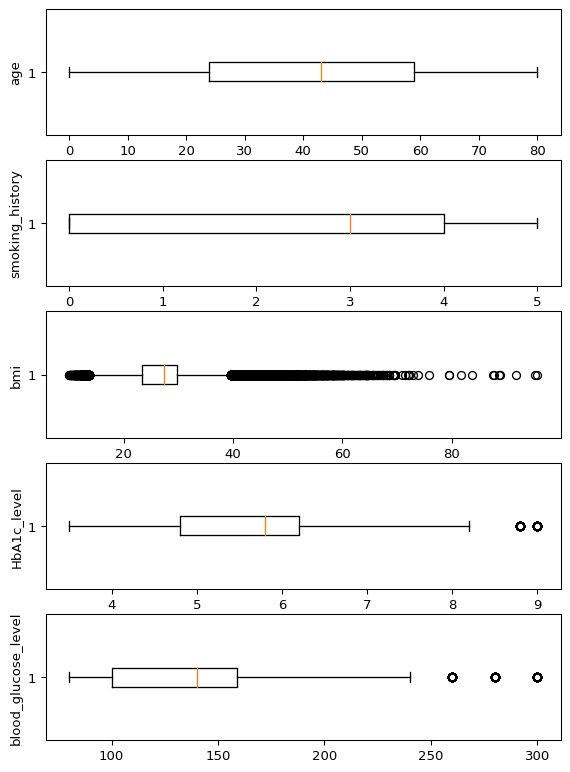

In [ ]:
num_columns = len(out_col.columns)
fig, axs = plt.subplots(num_columns,1,dpi=95, figsize=(7,num_columns*2))
i = 0
for col in out_col.columns:
  axs[i].boxplot(out_col[col].values, vert=False)
  axs[i].set_ylabel(col)
  i+=1
plt.show()

In [ ]:
def replace_outliers_inplace(df):
    out_col = ['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

    for column in out_col:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers inplace
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Call the function to replace outliers in the original DataFrame
df = replace_outliers_inplace(df)

# Verify the changes
print(df.head())


   age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  \
0   80             0              1                4  25.19          6.6   
1   54             0              0                0  27.32          6.6   
2   28             0              0                4  27.32          5.7   
3   36             0              0                1  23.45          5.0   
4   76             1              1                1  20.14          4.8   

   blood_glucose_level  diabetes  gender_Female  gender_Male  
0                140.0         0              1            0  
1                 80.0         0              1            0  
2                158.0         0              0            1  
3                155.0         0              1            0  
4                155.0         0              0            1  


In [ ]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80,0,1,4,25.19,6.6,140.0,0,1,0
1,54,0,0,0,27.32,6.6,80.0,0,1,0
2,28,0,0,4,27.32,5.7,158.0,0,0,1
3,36,0,0,1,23.45,5.0,155.0,0,1,0
4,76,1,1,1,20.14,4.8,155.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99994,36,0,0,0,24.60,4.8,145.0,0,1,0
99996,2,0,0,0,17.37,6.5,100.0,0,1,0
99997,66,0,0,3,27.83,5.7,155.0,0,0,1
99998,24,0,0,4,35.42,4.0,100.0,0,1,0


In [ ]:
# Columns with numerical values to calculate outliers
out_col = df[['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Dictionary to store percentage of outliers for each column
outliers_percentage = {}

# Calculate outliers using IQR method for each numerical column
for col in out_col.columns:
    Q1 = out_col[col].quantile(0.25)
    Q3 = out_col[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers based on calculated bounds
    outliers = out_col[(out_col[col] < lower_bound) | (out_col[col] > upper_bound)]

    # Calculate percentage of outliers relative to the total number of rows
    percentage_outliers = (len(outliers) / len(df)) * 100

    # Store the percentage of outliers for the current column
    outliers_percentage[col] = percentage_outliers

# Print the percentage of outliers for each column
for col, percentage in outliers_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in age: 0.00%
Percentage of outliers in smoking_history: 0.00%
Percentage of outliers in bmi: 0.00%
Percentage of outliers in HbA1c_level: 0.00%
Percentage of outliers in blood_glucose_level: 0.00%


##**Skewness**

In [ ]:
df.skew()

age                   -0.065555
hypertension           3.157676
heart_disease          4.642359
smoking_history       -0.082550
bmi                    0.177131
HbA1c_level           -0.236377
blood_glucose_level    0.432316
diabetes               2.903845
gender_Female         -0.341359
gender_Male            0.342141
dtype: float64

In [ ]:
def sqrt_transform(x):
    return np.sqrt(x)

In [ ]:
df['hypertension'] = df['hypertension'].apply(sqrt_transform)

Text(0.5, 1.02, 'Histograms with Density Curves of Numeric Features')

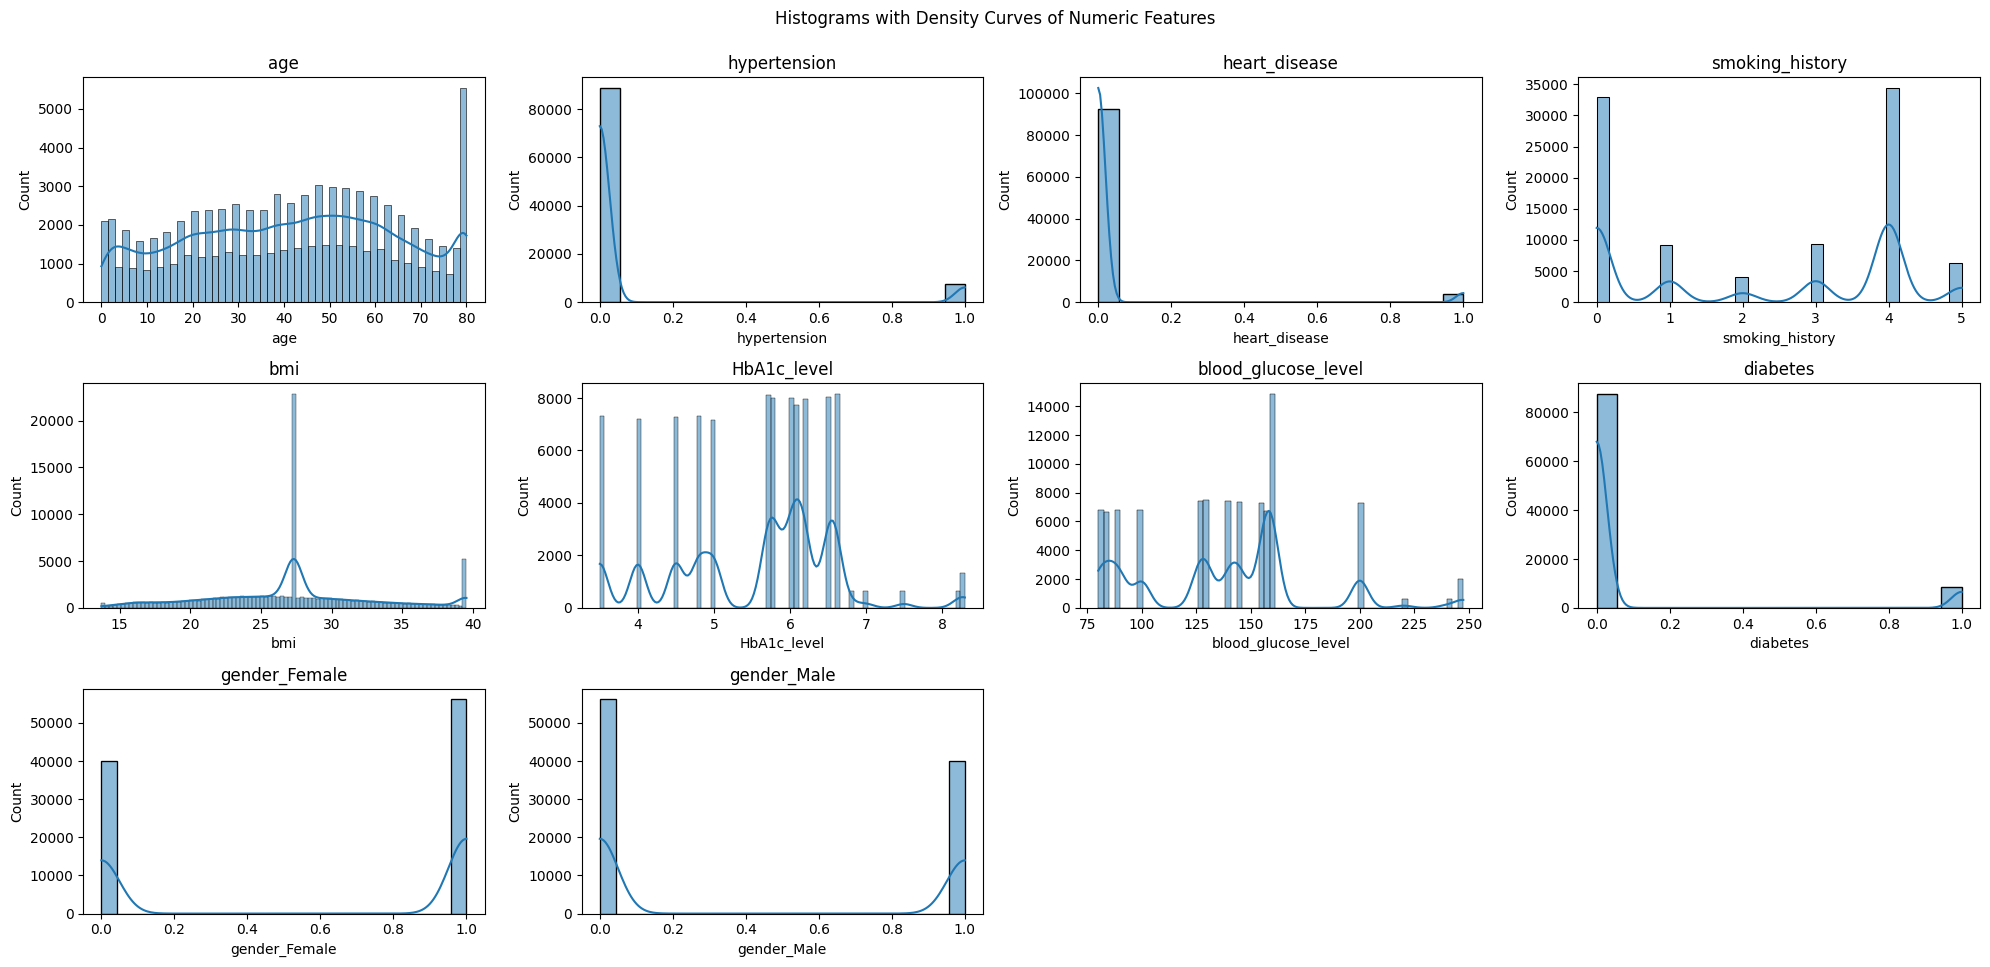

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Histograms with Density Curves of Numeric Features', y=1.02)

##**Splitting the data**

In [ ]:

X=df.drop('diabetes',axis=1)
y=df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Scaling**

In [ ]:
#minmax scaling
#minmax_scaler = MinMaxScaler()
#X_train_scaled = minmax_scaler.fit_transform(X_train)
#X_test_scaled = minmax_scaler.transform(X_test)

In [ ]:
#standard scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


#**Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target vector
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")


Random Forest Classifier Accuracy: 0.9671


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors (KNN) Accuracy: {accuracy_knn:.4f}")


K-Nearest Neighbors (KNN) Accuracy: 0.9504


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate and train the model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_ada = ada_model.predict(X_test)

# Calculating accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")


AdaBoost Classifier Accuracy: 0.9708


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming y_regression is your continuous target variable
# Instantiate and train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_reg = reg_model.predict(X_test)

# Calculating accuracy (for regression, typically use R^2 score or other metrics)
accuracy_reg = reg_model.score(X_test, y_test)
print(f"Linear Regression R^2 Score: {accuracy_reg:.4f}")


Linear Regression R^2 Score: 0.3286


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")


Decision Tree Classifier Accuracy: 0.9482
